In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns

# Load your data    
df = pd.read_csv("simulation_results_full.csv") 


In [64]:
# Compute fill rate if needed
df["avg_fill_rate"] = df["trade_count"] / df["total_executions"]
df.rename(columns={"price_volatility": "avg_volatility", "mm_final_pnl": "mm_pnl"}, inplace=True)

# Function to return mean and 95% CI
def mean_ci(x):
    n = len(x)
    mean = np.mean(x)
    if n < 2:
        ci = 0
    else:
        se = np.std(x, ddof=1) / np.sqrt(n)
        ci = t.ppf(1 - 0.025, n - 1) * se
    return pd.Series({"mean": mean, "ci": ci})

# Use apply per column
metrics = ["avg_spread", "avg_fill_rate", "avg_volatility", "mm_pnl"]
agg_list = []

for metric in metrics:
    temp = df.groupby("Scenario")[metric].apply(mean_ci).reset_index()
    temp.columns = ["Scenario", f"{metric}_mean", f"{metric}_ci"]
    agg_list.append(temp)

# Merge all metrics into one DataFrame
from functools import reduce
agg = reduce(lambda left, right: pd.merge(left, right, on="Scenario"), agg_list)

print(agg.head())

  Scenario avg_spread_mean  avg_spread_ci avg_fill_rate_mean  \
0       S1            mean       2.980823               mean   
1       S1            mean       2.980823               mean   
2       S1            mean       2.980823               mean   
3       S1            mean       2.980823               mean   
4       S1            mean       2.980823                 ci   

   avg_fill_rate_ci avg_volatility_mean  avg_volatility_ci mm_pnl_mean  \
0          0.974312                mean           0.000026        mean   
1          0.974312                mean           0.000026          ci   
2          0.974312                  ci           0.000005        mean   
3          0.974312                  ci           0.000005          ci   
4          0.005430                mean           0.000026        mean   

    mm_pnl_ci  
0  378.746875  
1   84.900983  
2  378.746875  
3   84.900983  
4  378.746875  


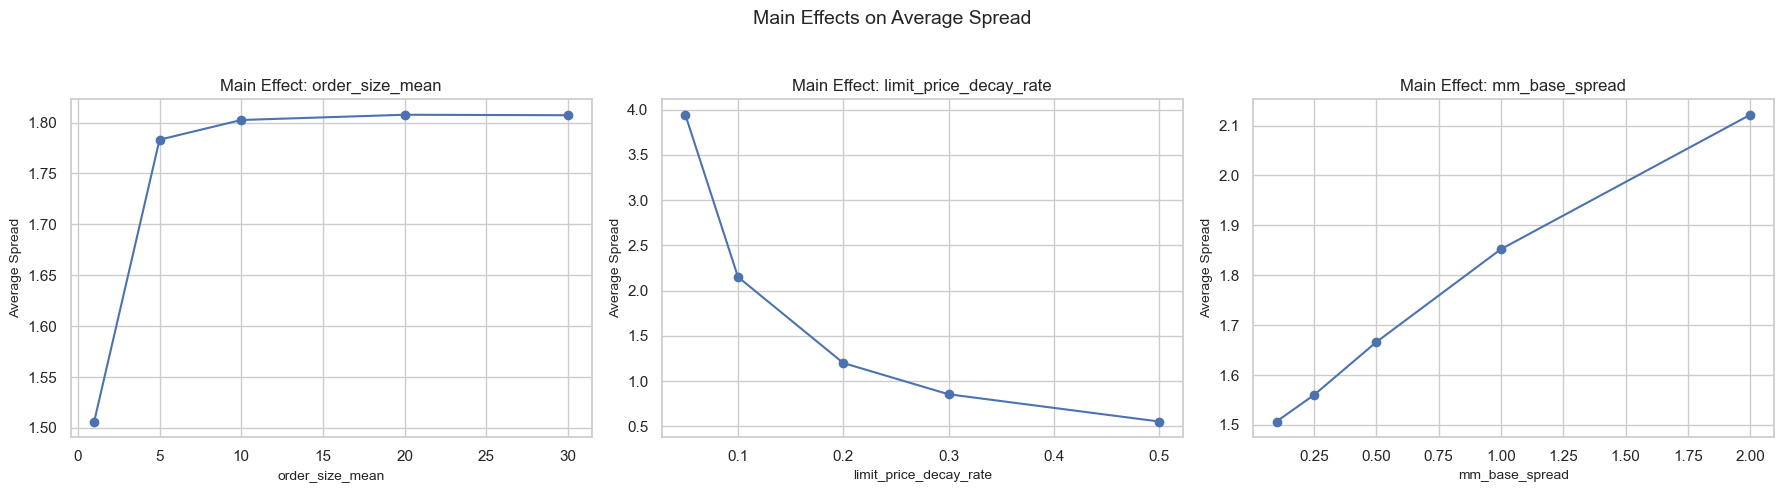

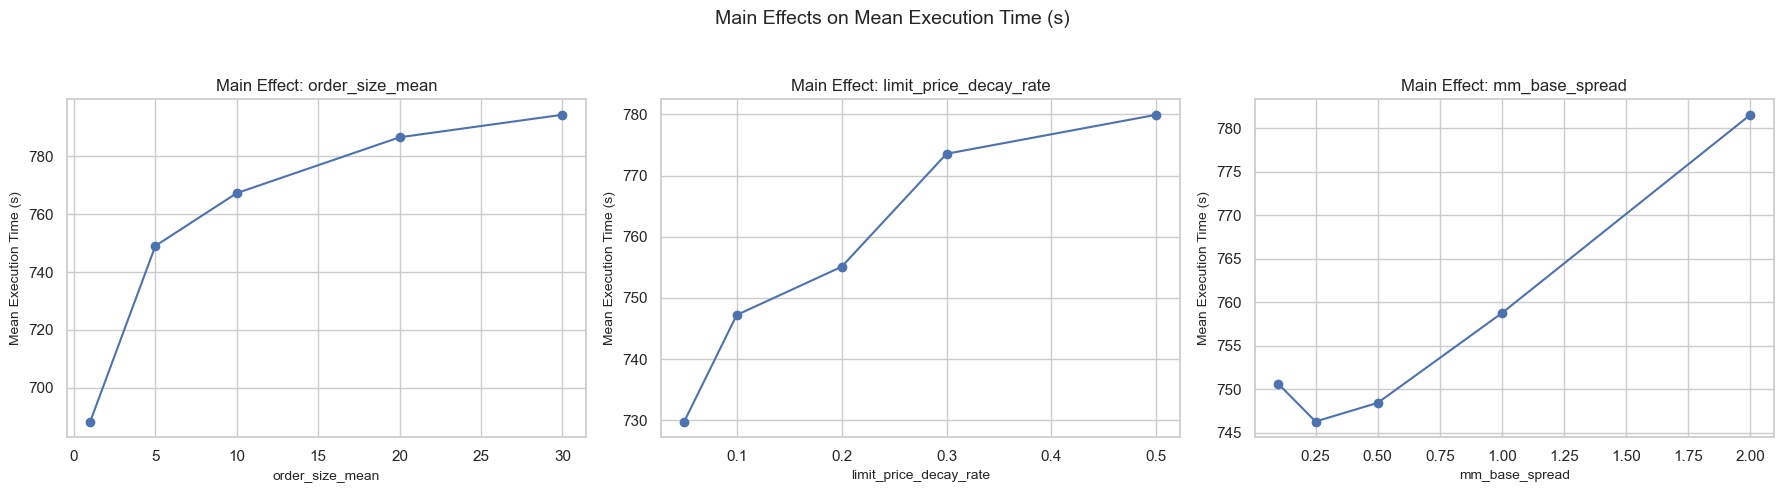

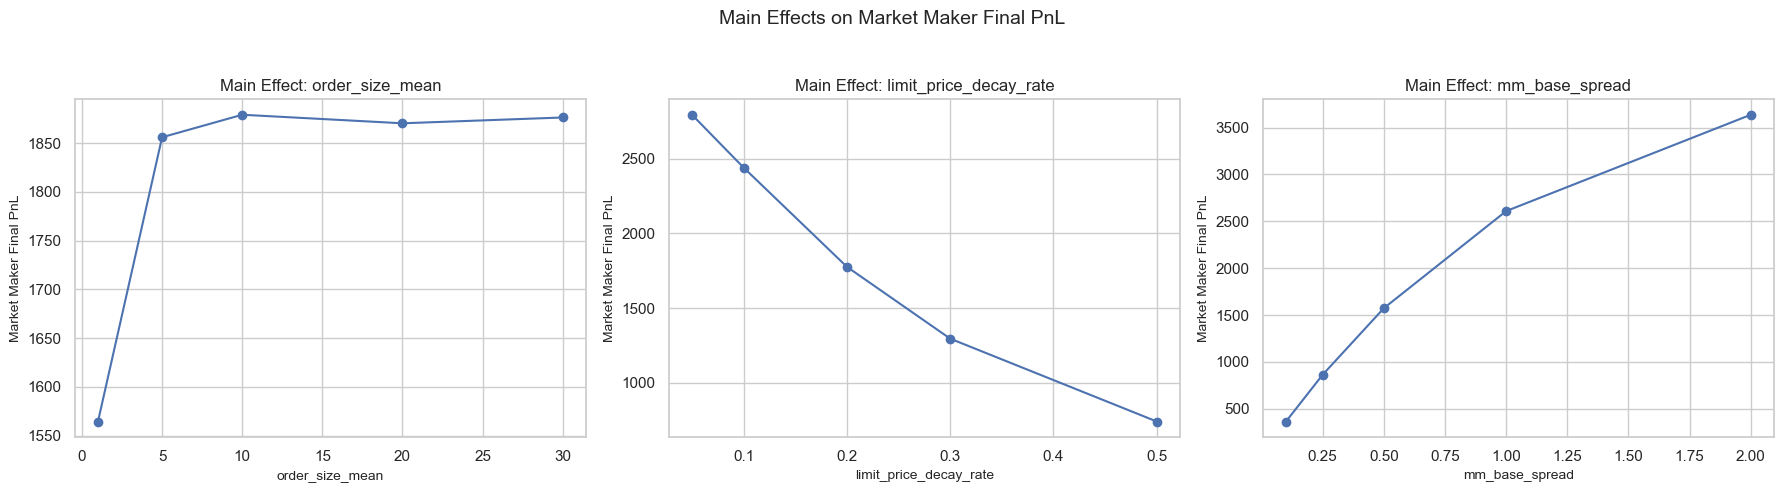

In [65]:
# Factors for main effects
factors = ["order_size_mean", "limit_price_decay_rate", "mm_base_spread"]

# Metrics to plot
metrics = {
    "avg_spread_Mean": "Average Spread",
    "mean_exec_time_Mean": "Mean Execution Time (s)",
    "mm_final_pnl_Mean": "Market Maker Final PnL"
}

# Create plots for each metric
for metric_col, metric_label in metrics.items():
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    for ax, factor in zip(axes, factors):
        # Compute mean across other factors
        grouped = df.groupby(factor)[metric_col].mean()
        ax.plot(grouped.index, grouped.values, marker='o', linestyle='-', color='C0')
        ax.set_title(f"Main Effect: {factor}", fontsize=12)
        ax.set_xlabel(factor, fontsize=10)
        ax.set_ylabel(metric_label, fontsize=10)
    
    plt.suptitle(f"Main Effects on {metric_label}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

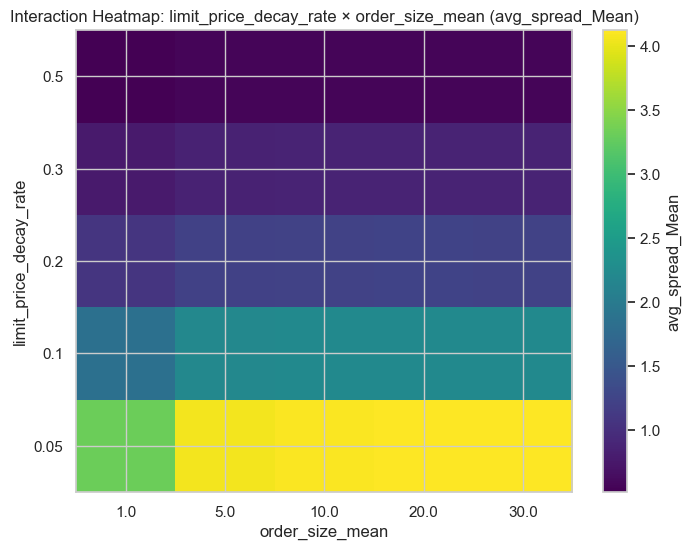

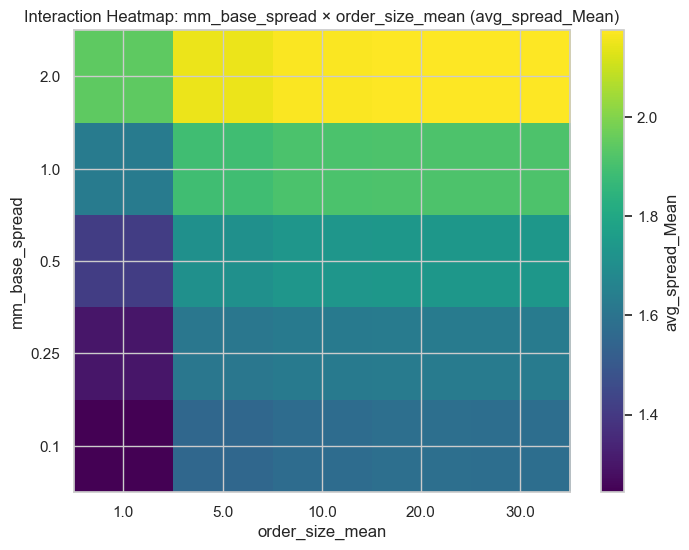

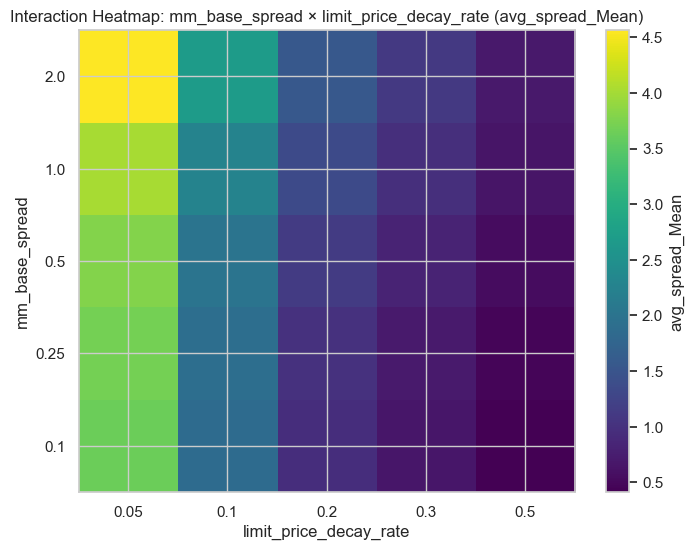

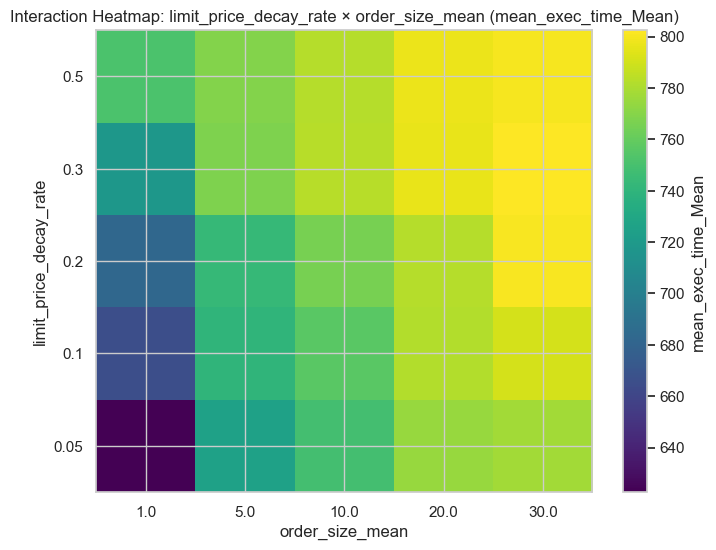

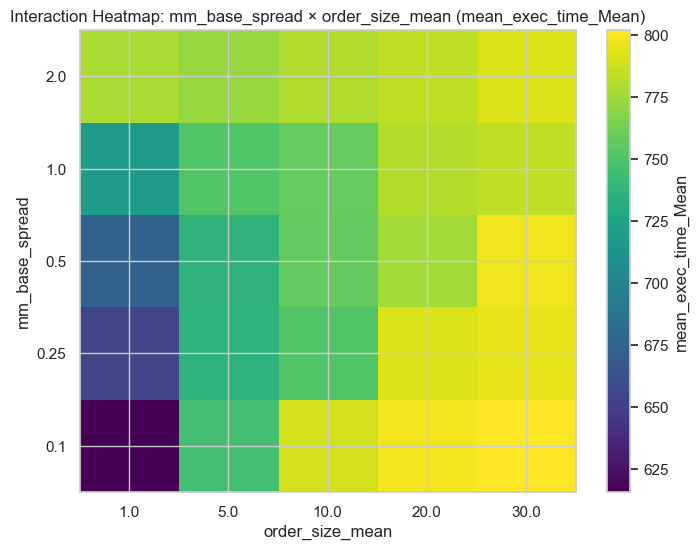

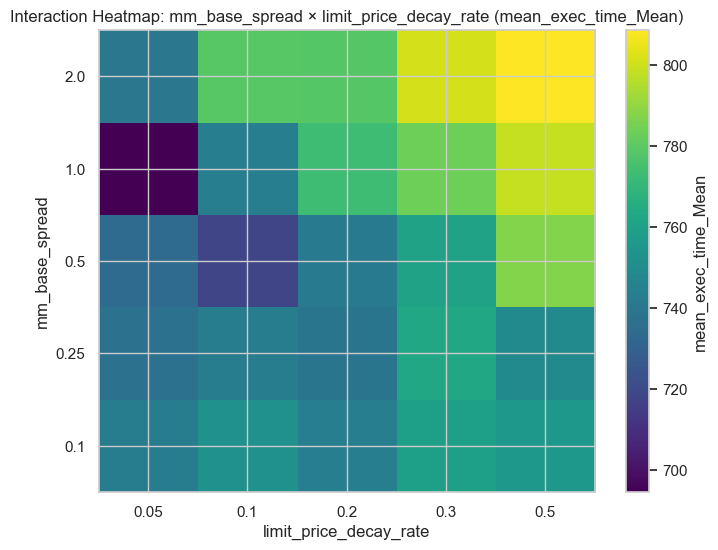

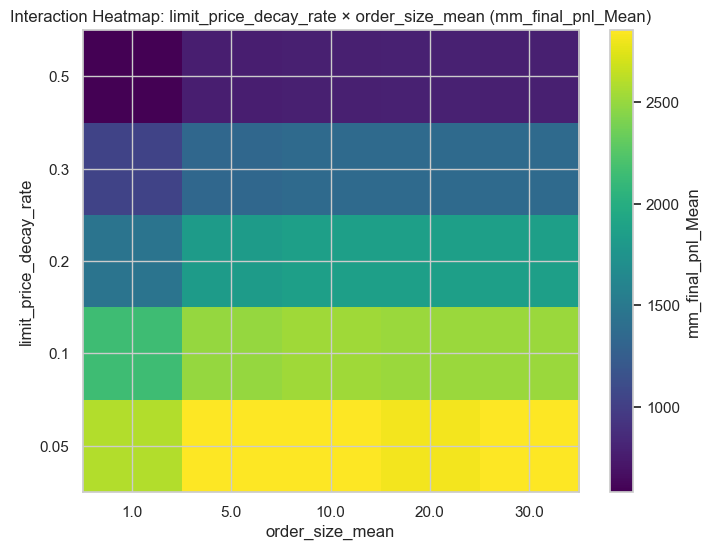

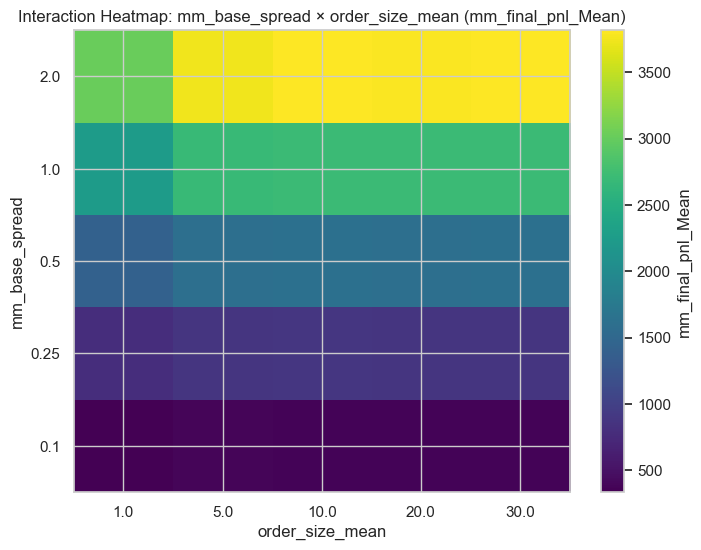

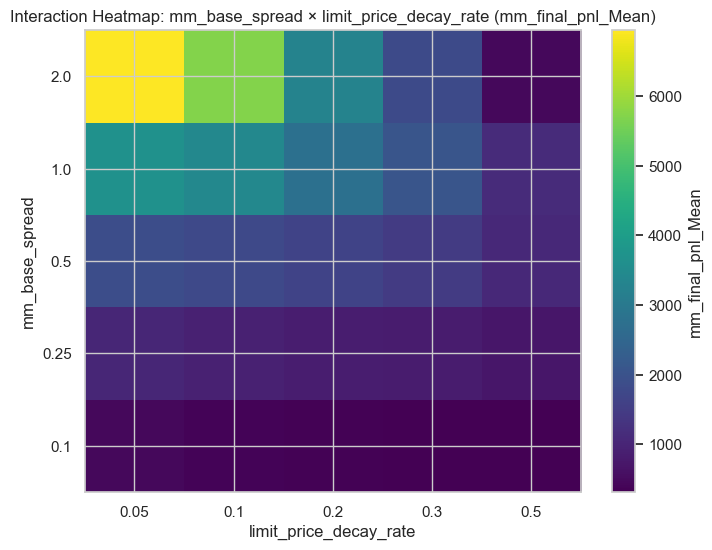

In [66]:
from itertools import combinations

for metric in metrics:
    for (x_var, y_var) in combinations(factors, 2):
        pivot = df.groupby([y_var, x_var])[metric].mean().unstack()
        
        plt.figure(figsize=(8,6))
        plt.imshow(pivot, aspect="auto", origin="lower", cmap="viridis")
        plt.colorbar(label=metric)
        plt.xticks(range(len(pivot.columns)), pivot.columns)
        plt.yticks(range(len(pivot.index)), pivot.index)
        plt.xlabel(x_var)
        plt.ylabel(y_var)
        plt.title(f"Interaction Heatmap: {y_var} × {x_var} ({metric})")
        plt.show()

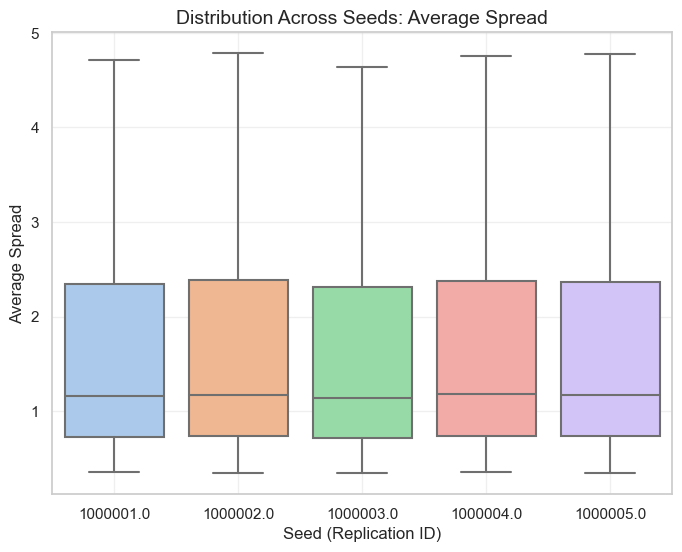

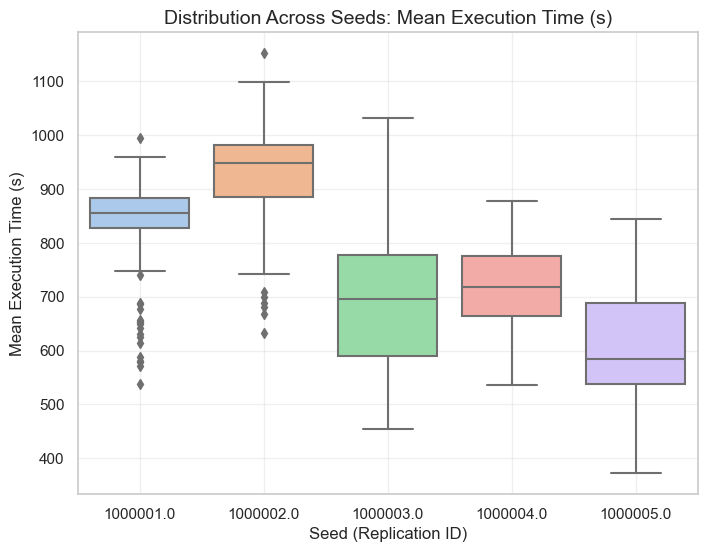

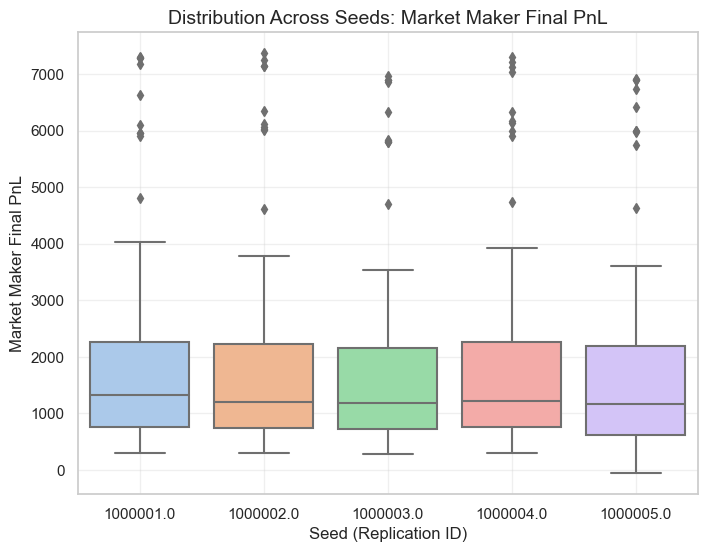

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("simulation_results_full.csv")

# Optional: compute avg_fill_rate if needed
df["avg_fill_rate"] = df["trade_count"] / df["total_executions"]

# Metrics to plot
metrics = {
    "avg_spread": "Average Spread",
    "mean_exec_time": "Mean Execution Time (s)",
    "mm_final_pnl": "Market Maker Final PnL"
}

# Make plots for each metric
for metric_col, metric_label in metrics.items():
    plt.figure(figsize=(8,6))
    sns.boxplot(x="seed", y=metric_col, data=df, palette="pastel")
    plt.title(f"Distribution Across Seeds: {metric_label}", fontsize=14)
    plt.xlabel("Seed (Replication ID)", fontsize=12)
    plt.ylabel(metric_label, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()
